# Проект: Исследование сервиса аренды самокатов

**Описание проекта**

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
Сервисом можно пользоваться:
 - без подписки:
* абонентская плата отсутствует;
* стоимость одной минуты поездки — 8 рублей;
* стоимость старта (начала поездки) — 50 рублей;
 - с подпиской Ultra:
* абонентская плата — 199 рублей в месяц;
* стоимость одной минуты поездки — 6 рублей;
* стоимость старта — бесплатно.

**Описание датасета**

Основная информация о пользователях, их поездках и подписках записана в файле `users_go.csv`:
- `user_id` - уникальный идентификатор пользователя;
- `name` - 	имя пользователя;
- `age` - 	возраст;
- `city` - 	город;
- `subscription_type` - 	тип подписки (free, ultra).

Информация о поездках в файле `rides_go.csv`:
- `user_id` - 		уникальный идентификатор пользователя;
- `distance` - 		расстояние, которое пользователь проехал в текущей сессии (в метрах);
- `duration` - 		продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
- `date` -	дата совершения поездки.

Информация о подписках в файле `subscriptions_go.csv`:
- `subscription_type` - 		тип подписки;
- `minute_price` - 		стоимость одной минуты поездки по данной подписке;
- `start_ride_price` - 		стоимость начала поездки;
- `subscription_fee` - 		стоимость ежемесячного платежа.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st

#### Шаг 1. Загрузка данных

In [4]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
except:    
    users = pd.read_csv('D:/Данные/users_go.csv')

try:
    rides = pd.read_csv('/datasets/rides_go.csv')
except:    
    rides = pd.read_csv('D:/Данные/rides_go.csv')
    
try:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:    
    subscriptions = pd.read_csv('D:/Данные/subscriptions_go.csv')    
    
display(users.head())
display(users.tail())
display(users.info())
display()
display(rides.head())
display(rides.tail())
display(rides.info())
display()
display(subscriptions.head())
display(subscriptions.tail())
display(subscriptions.info())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,name,age,city,subscription_type
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra
1564,1045,Артемий,28,Ростов-на-Дону,free


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,user_id,distance,duration,date
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27
18067,1534,2371.711192,15.893917,2021-12-29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

**Промежуточный вывод**

После записи данных о пользователях, совершенных поездках и подписках в переменные `users`, `rides` и `subscriptions` соответственно и первичного знакомства с данными было выявлено:

* Датасет `users` содержит 5 столбцов с данными о пользователях, из которых столбцы с идентификаторами пользователей и информацией о возрасте имеют целочисленный тип, в то время как имя, город и тип подписки имеют строковый тип данных. 
Исходя из общего числа строк в датасете, равным 1565, делаем вывод о том, что датасет содержит информацию о 1565 пользователях.


* Датасет `rides` содержит 4 столбца с данными о поездках, из которых столбец с идентификаторами пользователей имеет целочисленный тип, в то время как продолжительность и длина поездок имеют тип данных с плавающей точкой, а дата поездки - строковый тип данных.  
Исходя из общего числа строк в датасете, равным 18068, делаем вывод о том, что датасет содержит информацию о 18068 поездках.


* Датасет `subscriptions` содержит 4 столбца с данными о видах подписок, из которых столбцы со стоимостью одной минуты поездки, стоимостью начала поездки и стоимостью ежемесячного платежа имеют целочисленный тип, в то время как тип подписки - строковый тип данных.  
Количество строк в датасете - две, с двумя видами подписок: бесплатной и платной.

Также видим, что во всех трех датасетах нет пропущенных значений. Будет полезным отметить, что датасеты `users` и `rides` имеют общий столбец с идентификаторами пользователей, а датасеты `users` и `subscriptions` имеют общий столбец с типом подписки.

#### Шаг 2. Предобработка данных

In [3]:
# 2.1 Приведите столбец date к типу даты pandas.
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

# 2.2 Создайте новый столбец с номером месяца
rides['date_month'] = rides['date'].dt.month

# 2.3 Проверьте наличие пропущенных значений и дубликатов

# пропуски в датафреймах rides и users
print(rides.isna().sum())
print(users.isna().sum())
print()
# дубли в названиях
print(users['city'].sort_values().unique())
print(users['subscription_type'].sort_values().unique())
print()
# дубли строк
print(users.duplicated().sum())
print(rides.duplicated().sum())

user_id       0
distance      0
duration      0
date          0
date_month    0
dtype: int64
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

['Екатеринбург' 'Краснодар' 'Москва' 'Омск' 'Пятигорск' 'Ростов-на-Дону'
 'Сочи' 'Тюмень']
['free' 'ultra']

31
0


In [4]:
# Обнаружена 31 строка-дубль в датафрейме users, удаляем:
users = users.drop_duplicates()

In [5]:
# Проверка, за какие годы предоставлены данные:
rides['date_year'] = rides['date'].dt.year
print(rides['date_year'].value_counts()) 

2021    18068
Name: date_year, dtype: int64


**Промежуточный вывод**

Столбец date был приведен к типу даты pandas.
Также был создан новый столбец с номером месяца.

Пропущенные значения и дубликаты в названиях городов и типах подписок не были обнаружены.
Были найдены и удалены дубли строк в датафрйме с пользователями.

Дополнительно была проведена проверка, за какие годы предоставлены данные о поездах, во избежание последующего некорректного анализа в разрезе месяцев поездок. Данные приведены за один год - 2021.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

<AxesSubplot:title={'center':'Частота встречаемости городов'}, xlabel='Города', ylabel='Кол-во пользователей'>

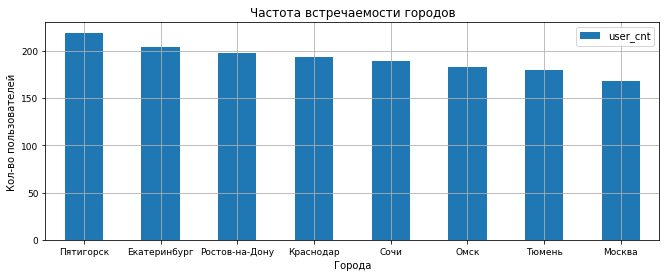

In [6]:
display(users
        .groupby('city').agg(user_cnt=('user_id', 'count')).reset_index()
        .sort_values(by='user_cnt', ascending = False)
        .plot.bar(x='city', y='user_cnt', title='Частота встречаемости городов', rot=0, grid=True, figsize=(11, 4), fontsize=9, xlabel='Города', ylabel='Кол-во пользователей'));

Видим, что в выборке присутствуют 8 различных городов.
Самое большое число пользователей в Пятигорске - примерно 220 человек, самое маленькое число пользователей в Москве - около 165 человек. В остальных городах число пользователей варьируется примерно от 180 до 205 человек.

##### Соотношение пользователей с подпиской и без подписки

<AxesSubplot:title={'center':'Соотношение пользователей с подпиской и без подписки'}, ylabel='Доли пользователей'>

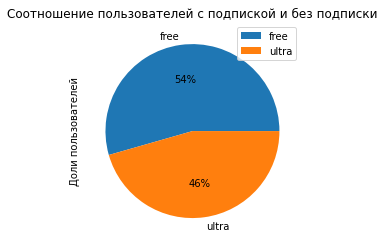

In [8]:
display(users
        .groupby('subscription_type').agg(user_cnt=('user_id', 'count'))
        .sort_values(by='user_cnt', ascending = False)
        .plot(kind='pie', y='user_cnt', title='Соотношение пользователей с подпиской и без подписки', autopct='%1.0f%%', xlabel='Тип подписки', ylabel='Доли пользователей'));

Количество пользователей без подписки превышает на 8 % количество пользователей с подпиской и составляет примерно 845 человек против 720.

##### Возраст пользователей

<AxesSubplot:title={'center':'Возраст пользователей'}, xlabel='Возраст', ylabel='Кол-во пользователей'>

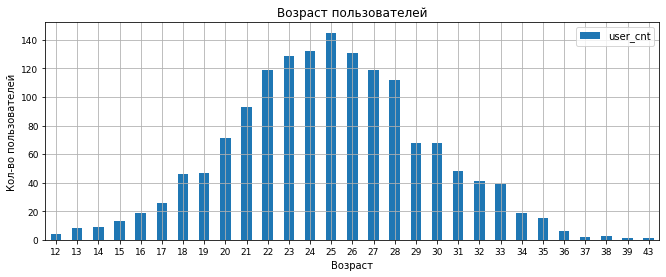

In [9]:
display(users
        .groupby('age').agg(user_cnt=('user_id', 'count')).reset_index()
        .sort_values(by='age')
        .plot.bar(x='age', y='user_cnt', title='Возраст пользователей', rot=0, grid=True, figsize=(11, 4), fontsize=9, xlabel='Возраст', ylabel='Кол-во пользователей'));

Возраст пользователей распределяется нормально: начиная от около пяти человек двенадцати лет с шагом 1 год увеличивается до максимального числа пользователей 145 человек возраста 25 лет и также с шагом в 1 год постепенно уменьшается до 1 пользователя возрастом 39 и 43 года.
Основной возраст пользователей находится в диапазоне от 18 до 33 лет, в каждой из этих возрастных групп не менее 40 человек.

##### Расстояние, которое пользователь преодолел за одну поездку

<AxesSubplot:title={'center':'Расстояние, которое пользователь преодолел за одну поездку (в метрах)'}, ylabel='Frequency'>

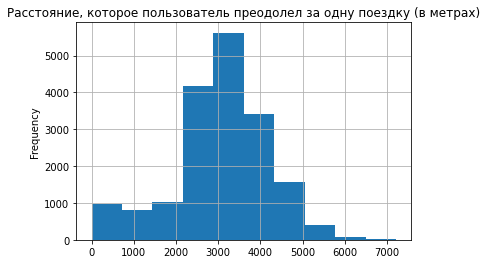

In [10]:
display(rides['distance']        
        .plot(kind='hist', title='Расстояние, которое пользователь преодолел за одну поездку (в метрах)', grid=True, xlabel='Расстояние (в метрах)', ylabel='Кол-во пользователей'));

Большинство поездок совершаются на расстояние от 2 до 4 км.
При этом короткие поездки до 2 км происходят намного чаще, чем длинные поездки от 5 км.

##### Продолжительность поездок

<AxesSubplot:title={'center':'Продолжительность поездок (в минутах) '}, ylabel='Frequency'>

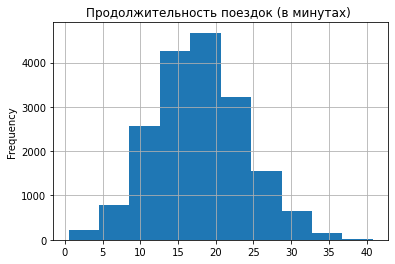

In [11]:
display(rides['duration']        
        .plot(kind='hist', title='Продолжительность поездок (в минутах) ', grid=True));

Большинство поездок длятся от 8,5 до 25 минут.
Также присутсвуют небольшое число коротких поездок от 1 до 4 минут и единичные случаи продолжительных поездок дольше 37 минут.

#### Шаг 4. Объединение данных

##### Объединенный датафрейм методом merge()

In [12]:
combined = (users
            .merge(rides, how='left', on='user_id')
            .merge(subscriptions, how='left', on='subscription_type')
           )

# проверка
display(combined.head(), combined.tail(), rides.shape[0], combined.shape[0])

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,date_year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,date_month,date_year,minute_price,start_ride_price,subscription_fee
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,2021,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,2021,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,2021,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,2021,8,50,0
18067,1534,Альберт,25,Краснодар,free,2371.711192,15.893917,2021-12-29,12,2021,8,50,0


18068

18068

Создан объединенный датафрейм `combined`, который совмещает в себе информацию о пользователях, совершенных поездках и условиях подписок. 
Проверено, что кол-во строк в общем датафрейме и датафрейме с поездками совпадают.

##### Отдельные датафреймы из объединенного датафрейма combined c данными о пользователях без подписки/с подпиской

In [13]:
# Пользователи без подписки

combined_free = combined.query('subscription_type == "free"')

# Пользователи с подпиской

combined_ultra = combined.query('subscription_type == "ultra"')

# проверка
display(combined.head(30))
display(combined_free.head(30))
display(combined_ultra.head(30))

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,date_year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,2021,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,2021,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,2021,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,2021,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,2021,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,date_month,date_year,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,2021,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,2021,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,2021,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,2021,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,2021,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,2021,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,2021,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,2021,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,2021,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,2021,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,date_month,date_year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,2021,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,2021,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,2021,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,2021,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,2021,6,0,199


##### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий. 

<AxesSubplot:title={'center':'Расстояние, которое пользователь преодолел за одну поездку (в метрах)'}, ylabel='Frequency'>

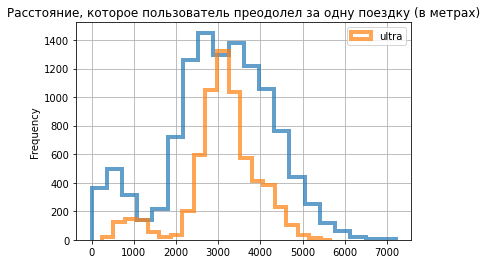

In [14]:
combined_free['distance'].plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=20,
    linewidth=4,
    alpha=0.7,
    label='free',
)
combined_ultra['distance'].plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=20,
    linewidth=4,
    alpha=0.7,
    label='ultra',
    grid=True,
    legend=True,
    title='Расстояние, которое пользователь преодолел за одну поездку (в метрах)'
)

Видим, что разброс в километраже поездок для пользователей без подписки больше: пользователи совершили поездки на расстояние от практически 1 метра до чуть более 7 км. В то время как поездки пользователей с подпиской варьируются от 200 метров до 5,7 км.
Поездки на расстояние от 1,6 до 2,1 км не очень популярны среди пользователей с подпиской. Похожий провал на графике есть среди пользователей без подписки, но с другими значениями: от 1 км. до 1,8 км.
При этом среднее расстояние для обеих групп пользователей примерно одинаково и составляет чуть более 3 км.

<AxesSubplot:title={'center':'Продолжительность поездок пользователей (в минутах)'}, ylabel='Frequency'>

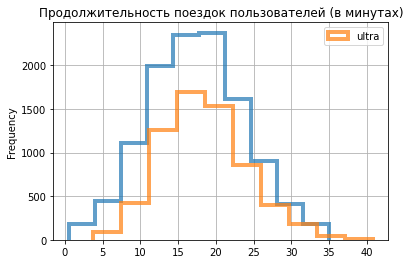

In [15]:
combined_free['duration'].plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=10,
    linewidth=4,
    alpha=0.7,
    label='free',
)
combined_ultra['duration'].plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=10,
    linewidth=4,
    alpha=0.7,
    label='ultra',
    grid=True,
    legend=True,
    title='Продолжительность поездок пользователей (в минутах)'
)

Видим, что продолжительность поездок среди двух групп пользователей очень похожи между собой за небольшим исключением: среди пользователей с подпиской нет поездок менее 3 минут, в то время как минимальная поездка для пользователей без подписки - 1 минута. Также максимальная продолжительность поездки среди пользователей без подписки - 35 минут (возможно это установленное ограничение в приложении), для пользователей с подпиской - свыше 40 минут.

#### Шаг 5. Подсчёт выручки

##### Сводный датафрейм: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [16]:
# Добавим вспомогательный столбец с округлением длительности поездок для последующего расчета помесячной выручки

combined['duration_sub'] = np.ceil(combined['duration'])

agg_data = (combined.groupby(['user_id', 'date_month']).agg(
    total_distance=('distance', 'sum'), 
    total_rides=('user_id', 'count'), 
    total_duration=('duration', 'sum'),
    total_duration_sub=('duration_sub', 'sum'),
    minute_price=('minute_price', 'first'),
    start_ride_price=('start_ride_price', 'first'),
    subscription_fee=('subscription_fee', 'first'),
    subscription_type=('subscription_type', 'first')).reset_index()  #сохраним тип подписки для задания 6.3
        );

##### Новый столбец с помесячной выручкой, которую принёс каждый пользователь.

In [17]:
agg_data['revenue_month'] = (
    agg_data['total_rides'] * agg_data['start_ride_price'] 
    + agg_data['total_duration_sub'] * agg_data['minute_price'] 
    + agg_data['subscription_fee'] 
)

In [18]:
# проверка
display(agg_data.head())
display(agg_data.tail())

# удаление из аггрегированного датафрейма вспомогательных столбцов:
agg_data = agg_data.drop(['total_duration_sub', 'minute_price', 'start_ride_price', 'subscription_fee'], axis=1)

# проверка
display(agg_data.head())
display(agg_data.tail())

,user_id,date_month,total_distance,total_rides,total_duration,total_duration_sub,minute_price,start_ride_price,subscription_fee,subscription_type,revenue_month
0,1,1,7027.511294,2,41.416640,42.0,6,0,199,ultra,451.0
1,1,4,754.159807,1,6.232113,7.0,6,0,199,ultra,241.0
2,1,8,6723.470560,2,44.776802,46.0,6,0,199,ultra,475.0
3,1,10,5809.911100,2,31.578017,32.0,6,0,199,ultra,391.0
4,1,11,7003.499363,3,53.397424,56.0,6,0,199,ultra,535.0


,user_id,date_month,total_distance,total_rides,total_duration,total_duration_sub,minute_price,start_ride_price,subscription_fee,subscription_type,revenue_month
11326,1534,6,3409.468534,2,24.812678,26.0,8,50,0,free,308.0
11327,1534,8,7622.453034,2,47.205960,48.0,8,50,0,free,484.0
11328,1534,9,4928.173852,1,22.560373,23.0,8,50,0,free,234.0
11329,1534,11,13350.015305,4,76.342174,78.0,8,50,0,free,824.0
11330,1534,12,2371.711192,1,15.893917,16.0,8,50,0,free,178.0


,user_id,date_month,total_distance,total_rides,total_duration,subscription_type,revenue_month
0,1,1,7027.511294,2,41.416640,ultra,451.0
1,1,4,754.159807,1,6.232113,ultra,241.0
2,1,8,6723.470560,2,44.776802,ultra,475.0
3,1,10,5809.911100,2,31.578017,ultra,391.0
4,1,11,7003.499363,3,53.397424,ultra,535.0


,user_id,date_month,total_distance,total_rides,total_duration,subscription_type,revenue_month
11326,1534,6,3409.468534,2,24.812678,free,308.0
11327,1534,8,7622.453034,2,47.205960,free,484.0
11328,1534,9,4928.173852,1,22.560373,free,234.0
11329,1534,11,13350.015305,4,76.342174,free,824.0
11330,1534,12,2371.711192,1,15.893917,free,178.0


#### Шаг 6. Проверка гипотез

##### Проверьте гипотезу: тратят ли пользователи с подпиской больше времени на поездки? 

Необходимо проверить, тратят ли пользователи с подпиской больше времени на поездки по сравнению с пользователями без подписки. Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 
Таким образом, сравниваем две генеральные совокупности и формулируем нулевую и альтернативные гипотезы:

* Н0: Пользователи с подпиской тратят столько же времени на поездки, сколько и пользователи без подписки.

* Н1: Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [19]:
alpha = 0.01 # задаем уровень стат. значимости

# пользователи без подписки
#combined_free 

# пользователи с подпиской
#combined_ultra 

results = st.ttest_ind(combined_ultra['duration'], combined_free['duration'], alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

# проверка средних из 2х выборок    
display(combined_ultra['duration'].mean(), combined_free['duration'].mean(), 
        combined_ultra['duration'].median(), combined_free['duration'].median() )

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


18.54198516280583

17.39090929866399

18.17815320055055

17.326890226082043

**Вывод**  

Полученное значение p_value стремится к нулю и значительно меньше заданного уровня статистической значимости. 
Отвергаем нулевую гипотезу в пользу альтернативной и делаем вывод о том, что вероятно пользователи с подпиской тратят больше времени на поездки в сравнении с пользователями без подписки.


##### Проверьте гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Необходимо проверить, что длина поездок пользователей с подпиской за одну поездку не превышает 3130 метров.
Таким образом, сравниваем выборку с заданным оптимальным значением 3130 метров и формулируем нулевую и альтернативные гипотезы:

* Н0: Среднее расстояние равно 3130 метрам.

* Н1: Среднее расстояние превышает 3130 метров.

In [20]:
alpha = 0.01 # задаем уровень стат. значимости

# пользователи с подпиской
#combined_ultra 

optimal_distance = 3130

results = st.ttest_1samp(combined_ultra['distance'], optimal_distance, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')    
    
# проверка среднего 
display(combined_ultra['distance'].median())

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


3148.6372291760854

**Вывод**  

Полученное значение p_value показывает, что нулевая гипотеза не может быть отвергнута в пользу альтернативной о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 
Т.е. среднее расстояние в большинстве случаев будет стремиться к значению 3130. 

##### Проверьте гипотезу: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? 

Необходимо проверить, приносят ли пользователи с подпиской больше дохода компании по сравнению с пользователями без подписки. 
Таким образом, сравниваем две генеральные совокупности и формулируем нулевую и альтернативные гипотезы:

* Н0: Помесячная выручка от пользователей с подпиской равна выручке, которую принесли пользователи без подписки.

* Н1: Помесячная выручка от пользователей с подпиской превышает выручку, которую принесли пользователи без подписки.

In [21]:
alpha = 0.01 # задаем уровень стат. значимости

# пользователи без подписки
# agg_data.query('subscription_type==free')

# пользователи с подпиской
# agg_data.query('subscription_type==ultra')

results = st.ttest_ind(agg_data.query('subscription_type=="ultra"')['revenue_month'], 
                       agg_data.query('subscription_type=="free"')['revenue_month'], alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

# проверка средних из 2х выборок    
display(agg_data.query('subscription_type=="ultra"')['revenue_month'].median(), 
        agg_data.query('subscription_type=="free"')['revenue_month'].median() )

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


337.0

274.0

**Вывод**  

Полученное значение p-value стремится к нулю и значительно меньше заданного уровня статистической значимости. 
Отвергаем нулевую гипотезу в пользу альтернативной и делаем вывод о том, что с большой вероятностью выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

##### Какой тест вам понадобился бы для проверки гипотезы: количество обращений в техподдержку значимо снизилось после обновления серверов?

Представим, что данные о количестве обращений до обновления хранятся в объекте data_before, 
данные о количестве обращений после обновления хранятся в объекте data_after.
Т.к. в выборках содержатся данные по тем же пользователям до и после изменений, делаем вывод, что это парные зависимые выборки, для проверки которых необходим т-тест scipy.stats.ttest_rel.
Нужно проверить, что количество обращений в техподдержку значимо снизилось, т.е. до изменений обращений было больше, чем после изменений, поэтому в параметре alternative указываем greater.

scipy.stats.ttest_rel(data_before, data_after, alternative='greater')

**Общий вывод**  

Был проведен анализ данных о пользователях сервиса аренды самокатов из восьми городов.

Пользователи с подпиской составляют 46 % от общего числа пользователей, остальные 54 % пользователей не используют подписку.

Основной возраст пользователей находится в диапазоне от 18 до 33 лет.

Большинство поездок совершаются на расстояние от 2 до 4 км и длятся от 8,5 до 25 минут.

Проведенные т-тесты позволяют сделать выводы о том, что:
 - среднее расстояние в большинстве случаев будет стремиться к 3130 метрам;
 - вероятно пользователи с подпиской тратят больше времени на поездки в сравнении с пользователями без подписки;
 - с большой вероятностью выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.